# Multivariate analyses for TME cell comparison

Script related to figure 6b, s6a-b

### Aim:
- Perform multiple linear regression for TME cell subset variable comparison
- Perform logistic regression of TME cell subsets and variable comparison

In [1]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.0  IRdisplay_0.6.1 pbdZMQ_0.3-3    tools_3.5.0    
 [5] htmltools_0.4.0 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.4.6   
 [9] uuid_0.1-4      IRkernel_0.8.14 jsonlite_1.6.1  digest_0.6.25  
[13] repr_0.17       rlang_0.4.6     evaluate_0.14  

## Load packages

In [2]:
setwd("~/git_repos/HGSOC_TME_Heterogeneity/")

## Load sample labels

In [3]:
samples <- read.table('Data/5/NACT_SampleLabels.txt',
                      sep='\t',
                      header=T,
                      row.names='Well')

In [4]:
matched <- c(3368,371,9717,8674,2359,564,7765,6965,9347)

samples$Matched <- samples$Case_mRNA %in% matched

In [5]:
head(samples)

,Name,Case_mRNA,NACT,Site,Bounds,Matched
A01,A01_3368A_Liver,3368,Untreated,other,in,TRUE
A02,A02_3368B_Liver,3368,Treated,other,out,TRUE
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,TRUE
A04,A04_0371B_R_diaphragm,371,Treated,other,out,TRUE
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,TRUE
A06,A06_9717B_R_ovary,9717,Treated,ovary,out,TRUE


## Load ConsensusTME NES

In [6]:
consensus_data <- read.table('Data/5/ConsensusTME_NACT_NES.txt',
                             sep='\t',
                             header=T,
                             row.names='Term')

consensus_data <- t(consensus_data)
head(consensus_data)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
A01,0.2544767,0.16012391,0.23412023,0.14187053,-0.104189950,0.09241945,0.2670112,0.1720899,0.1814478,0.02192616,0.2304878,-0.02041523,0.1091831,0.3268816,-0.1512603,-0.12458821,-0.12105553,-0.17131674
A02,0.1831832,0.08682826,0.24272549,-0.03106225,-0.001941604,0.09346663,0.2836625,0.1048446,0.1960520,-0.11581174,0.2591486,-0.02526795,0.2488612,0.4832443,-0.1722784,-0.09932701,-0.11002029,-0.17662104
A03,0.3284338,0.25078253,0.35828990,0.35977859,0.118276210,0.30425047,0.4091265,0.2950658,0.3210669,0.04103930,0.3858617,0.02020867,0.3013136,0.4849676,0.1548997,0.09899607,0.02099488,0.12494436
A04,0.2229200,0.46928297,0.24966760,0.38595430,0.292185918,0.49939131,0.2848222,0.2185944,0.3128521,0.30652579,0.3205545,0.17078484,0.4332402,0.5125873,0.0690361,0.08209151,0.06589801,0.07791841
A05,0.1584463,0.14999672,0.09665491,-0.03893381,-0.136141994,0.03414850,0.2307931,0.1273806,0.2043502,-0.15383368,0.2006747,-0.09731896,0.2647767,0.2534280,-0.2120999,-0.16972010,-0.18042408,-0.28792353
A06,0.2086076,0.28042125,0.21956787,0.29585502,-0.127744151,0.03049037,0.3885820,0.2812594,0.3980291,-0.07557768,0.2615250,-0.01597149,0.2808125,0.3320963,-0.1439186,-0.14446257,-0.12065637,-0.19520560


### Split matched and unmatched samples data

In [7]:
matched   <- consensus_data[which(samples$Matched == TRUE ),]

unmatched <- consensus_data[which(samples$Matched == FALSE),]

In [8]:
dim(matched)

[1] 18 18

In [9]:
dim(unmatched)

[1] 38 18

In [10]:
38/2

[1] 19

In [11]:
tail(matched)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
B02,0.2402263,0.04165139,0.1960428,0.13219214,-0.03672601,0.26149548,0.3296904,0.2648137,0.2625680,0.11898768,0.2465675,-0.114436017,0.2835240,0.3383852,-0.16099866,-0.10924458,-0.10747554,-0.29836380
B03,0.2835227,0.33674780,0.4122715,0.22910920,0.22940228,0.28277541,0.4041324,0.3839678,0.4119708,0.05383048,0.2921816,0.127573340,0.3570923,0.6466582,0.03783387,0.14070057,0.11995260,0.15591034
B04,0.2839035,0.29739252,0.4115423,0.32445657,0.23703105,0.16866140,0.4024553,0.3650535,0.4139615,0.11777950,0.3647248,0.091471933,0.3717044,0.5847199,0.09239342,0.12828607,0.07697151,0.18938231
B05,0.2040914,0.10670975,0.2725495,0.17986191,0.42209691,0.23263157,0.3496187,0.2867881,0.2484168,0.02069893,0.3050340,0.004476703,0.4952381,0.5587154,0.11541886,0.05464495,-0.01055403,0.20189863
B06,0.1358404,-0.06047101,0.1364558,-0.01334995,-0.06623356,-0.03450019,0.3311684,0.2358284,0.1790985,-0.01447437,0.2186006,-0.174316371,0.1910897,0.1703691,-0.20636331,-0.20507770,-0.20014783,-0.35279681
B07,0.2521700,0.18689107,0.2492469,0.20180648,0.02932837,0.16933787,0.3171786,0.1382779,0.2975472,-0.06294442,0.2755501,0.040335033,0.2423303,0.5589227,-0.07622513,-0.01944428,-0.08464659,-0.07293489


### Remove columns not needed

In [12]:
matched    <- subset(
    cbind(matched, samples[which(samples$Matched == TRUE),]),
          select=-c(Name,Case_mRNA,Site,Bounds,Matched)
)

unmatched  <- subset(
    cbind(unmatched, samples[which(samples$Matched == FALSE),]),
    select=-c(Name,Case_mRNA,Site,Bounds,Matched)
)

In [13]:
head(matched)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,NACT
A01,0.2544767,0.16012391,0.23412023,0.14187053,-0.104189950,0.09241945,0.2670112,0.1720899,0.1814478,0.02192616,0.2304878,-0.02041523,0.1091831,0.3268816,-0.1512603,-0.12458821,-0.12105553,-0.17131674,Untreated
A02,0.1831832,0.08682826,0.24272549,-0.03106225,-0.001941604,0.09346663,0.2836625,0.1048446,0.1960520,-0.11581174,0.2591486,-0.02526795,0.2488612,0.4832443,-0.1722784,-0.09932701,-0.11002029,-0.17662104,Treated
A03,0.3284338,0.25078253,0.35828990,0.35977859,0.118276210,0.30425047,0.4091265,0.2950658,0.3210669,0.04103930,0.3858617,0.02020867,0.3013136,0.4849676,0.1548997,0.09899607,0.02099488,0.12494436,Untreated
A04,0.2229200,0.46928297,0.24966760,0.38595430,0.292185918,0.49939131,0.2848222,0.2185944,0.3128521,0.30652579,0.3205545,0.17078484,0.4332402,0.5125873,0.0690361,0.08209151,0.06589801,0.07791841,Treated
A05,0.1584463,0.14999672,0.09665491,-0.03893381,-0.136141994,0.03414850,0.2307931,0.1273806,0.2043502,-0.15383368,0.2006747,-0.09731896,0.2647767,0.2534280,-0.2120999,-0.16972010,-0.18042408,-0.28792353,Untreated
A06,0.2086076,0.28042125,0.21956787,0.29585502,-0.127744151,0.03049037,0.3885820,0.2812594,0.3980291,-0.07557768,0.2615250,-0.01597149,0.2808125,0.3320963,-0.1439186,-0.14446257,-0.12065637,-0.19520560,Treated


In [14]:
str(matched)

'data.frame':	18 obs. of  19 variables:
 $ B_cells            : num  0.254 0.183 0.328 0.223 0.158 ...
 $ Cytotoxic_cells    : num  0.1601 0.0868 0.2508 0.4693 0.15 ...
 $ Dendritic_cells    : num  0.2341 0.2427 0.3583 0.2497 0.0967 ...
 $ Endothelial        : num  0.1419 -0.0311 0.3598 0.386 -0.0389 ...
 $ Eosinophils        : num  -0.10419 -0.00194 0.11828 0.29219 -0.13614 ...
 $ Fibroblasts        : num  0.0924 0.0935 0.3043 0.4994 0.0341 ...
 $ Macrophages        : num  0.267 0.284 0.409 0.285 0.231 ...
 $ Macrophages_M1     : num  0.172 0.105 0.295 0.219 0.127 ...
 $ Macrophages_M2     : num  0.181 0.196 0.321 0.313 0.204 ...
 $ Mast_cells         : num  0.0219 -0.1158 0.041 0.3065 -0.1538 ...
 $ Monocytes          : num  0.23 0.259 0.386 0.321 0.201 ...
 $ NK_cells           : num  -0.0204 -0.0253 0.0202 0.1708 -0.0973 ...
 $ Neutrophils        : num  0.109 0.249 0.301 0.433 0.265 ...
 $ Plasma_cells       : num  0.327 0.483 0.485 0.513 0.253 ...
 $ T_cells_CD4        : num  -0.1

## Performed matched analysis

### Stroma

In [15]:
stroma_matched_fit = lm(Endothelial+Fibroblasts~NACT, data = matched)

In [16]:
summary(stroma_matched_fit)


Call:
lm(formula = Endothelial + Fibroblasts ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43621 -0.16107 -0.02201  0.17561  0.38673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.49862    0.08485   5.876 2.34e-05 ***
NACTUntreated -0.18880    0.12000  -1.573    0.135    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2545 on 16 degrees of freedom
Multiple R-squared:  0.134,	Adjusted R-squared:  0.07986 
F-statistic: 2.476 on 1 and 16 DF,  p-value: 0.1352


### Innate

In [17]:
innate_matched_fit = lm(
    Dendritic_cells+Eosinophils+Macrophages+Macrophages_M1+Macrophages_M2+Mast_cells+Monocytes+Neutrophils+NK_cells~NACT,
    data = matched
)

In [18]:
summary(innate_matched_fit)


Call:
lm(formula = Dendritic_cells + Eosinophils + Macrophages + Macrophages_M1 + 
    Macrophages_M2 + Mast_cells + Monocytes + Neutrophils + NK_cells ~ 
    NACT, data = matched)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8658 -0.5103 -0.1213  0.4850  1.3331 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.0581     0.2143   9.603 4.81e-08 ***
NACTUntreated  -0.6155     0.3031  -2.031   0.0593 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.643 on 16 degrees of freedom
Multiple R-squared:  0.2049,	Adjusted R-squared:  0.1552 
F-statistic: 4.123 on 1 and 16 DF,  p-value: 0.05926


In [19]:
shapiro.test(innate_matched_fit$res)


	Shapiro-Wilk normality test

data:  innate_matched_fit$res
W = 0.92952, p-value = 0.1904


### Adaptive

In [20]:
adaptive_matched_fit = lm(
    B_cells+Plasma_cells+T_cells_CD4+T_cells_CD8+T_cells_gamma_delta+T_regulatory_cells~NACT,
    data = matched
)

In [21]:
summary(adaptive_matched_fit)


Call:
lm(formula = B_cells + Plasma_cells + T_cells_CD4 + T_cells_CD8 + 
    T_cells_gamma_delta + T_regulatory_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73667 -0.50628 -0.06466  0.34615  1.27717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.6218     0.2074   2.998  0.00851 **
NACTUntreated  -0.5433     0.2933  -1.852  0.08250 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6222 on 16 degrees of freedom
Multiple R-squared:  0.1766,	Adjusted R-squared:  0.1251 
F-statistic: 3.432 on 1 and 16 DF,  p-value: 0.0825


In [22]:
shapiro.test(adaptive_matched_fit$res)


	Shapiro-Wilk normality test

data:  adaptive_matched_fit$res
W = 0.90692, p-value = 0.07593


### Cytotoxic cells

In [23]:
nk_cytotoxic_matched_fit = lm(
    NK_cells + Cytotoxic_cells ~ NACT,
    data = matched
)

In [24]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [25]:
cd8_cytotoxic_matched_fit = lm(
    T_cells_CD8 + Cytotoxic_cells ~ NACT,
    data = matched
)

In [26]:
summary(cd8_cytotoxic_matched_fit)


Call:
lm(formula = T_cells_CD8 + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36561 -0.11931 -0.04218  0.14316  0.40437 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.20468    0.07646   2.677   0.0165 *
NACTUntreated -0.18338    0.10813  -1.696   0.1093  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2294 on 16 degrees of freedom
Multiple R-squared:  0.1524,	Adjusted R-squared:  0.09938 
F-statistic: 2.876 on 1 and 16 DF,  p-value: 0.1093


## Perform unmatched analysis

In [27]:
head(unmatched)

,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,NACT
B08,0.2498001,0.1454555298,0.22403339,0.20216359,-0.152162396,-0.03651893,0.3484167,0.2567119,0.20275182,-0.01906826,0.23239805,-0.06910932,0.18625729,0.4655307,-0.16401822,-0.10329955,-0.106470526,-0.16558988,Untreated
B09,0.1933006,0.0100639843,0.16839998,0.08350335,0.050037526,0.14307024,0.2745897,0.1688296,0.17643015,-0.05040785,0.21282044,-0.15095151,0.25534965,0.5082110,-0.18604703,-0.16329057,-0.195857597,-0.18388259,Treated
B10,0.2696923,0.1626807887,0.33781042,0.36189287,0.315413070,0.23546584,0.4502848,0.2421547,0.43870926,0.36489011,0.38368471,-0.06494259,0.41151377,0.6145221,-0.06454531,0.05888267,0.002355267,-0.05396421,Untreated
B11,0.3080569,0.0433975608,0.24843782,0.27937426,0.154183957,0.26661771,0.2910163,0.2152640,0.21200374,0.10240685,0.26178467,-0.03505903,0.25641958,0.4577898,-0.08345257,-0.06288239,-0.079102146,-0.09249925,Treated
B12,0.1218557,-0.0101676989,-0.04453268,0.10808702,-0.314087264,0.05244197,0.1840254,-0.0043899,0.09819619,-0.31202210,0.06983559,-0.23581790,0.04428593,0.3212982,-0.31160618,-0.24535552,-0.305152598,-0.27984613,Untreated
C01,0.2401842,0.0009513548,0.15064419,0.23364429,-0.008568283,0.22263256,0.2327631,0.1524298,0.21435683,-0.08310467,0.19027735,-0.11658550,0.24027765,0.3913319,-0.22732101,-0.21474312,-0.188621872,-0.23188398,Treated


In [28]:
str(unmatched)

'data.frame':	38 obs. of  19 variables:
 $ B_cells            : num  0.25 0.193 0.27 0.308 0.122 ...
 $ Cytotoxic_cells    : num  0.1455 0.0101 0.1627 0.0434 -0.0102 ...
 $ Dendritic_cells    : num  0.224 0.1684 0.3378 0.2484 -0.0445 ...
 $ Endothelial        : num  0.2022 0.0835 0.3619 0.2794 0.1081 ...
 $ Eosinophils        : num  -0.152 0.05 0.315 0.154 -0.314 ...
 $ Fibroblasts        : num  -0.0365 0.1431 0.2355 0.2666 0.0524 ...
 $ Macrophages        : num  0.348 0.275 0.45 0.291 0.184 ...
 $ Macrophages_M1     : num  0.25671 0.16883 0.24215 0.21526 -0.00439 ...
 $ Macrophages_M2     : num  0.2028 0.1764 0.4387 0.212 0.0982 ...
 $ Mast_cells         : num  -0.0191 -0.0504 0.3649 0.1024 -0.312 ...
 $ Monocytes          : num  0.2324 0.2128 0.3837 0.2618 0.0698 ...
 $ NK_cells           : num  -0.0691 -0.151 -0.0649 -0.0351 -0.2358 ...
 $ Neutrophils        : num  0.1863 0.2553 0.4115 0.2564 0.0443 ...
 $ Plasma_cells       : num  0.466 0.508 0.615 0.458 0.321 ...
 $ T_cells_CD4   

### Stroma

In [29]:
stroma_unmatched_fit = lm(
    Endothelial+Fibroblasts~NACT,
    data = unmatched
)

In [30]:
summary(stroma_unmatched_fit)


Call:
lm(formula = Endothelial + Fibroblasts ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32276 -0.13467  0.00037  0.13271  0.54451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.50000    0.04792  10.434 1.97e-12 ***
NACTUntreated -0.03344    0.06777  -0.493    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2089 on 36 degrees of freedom
Multiple R-squared:  0.006717,	Adjusted R-squared:  -0.02087 
F-statistic: 0.2434 on 1 and 36 DF,  p-value: 0.6247


### Innate

In [31]:
innate_unmatched_fit = lm(
    Dendritic_cells+Eosinophils+Macrophages+Macrophages_M1+Macrophages_M2+Mast_cells+Monocytes+Neutrophils+NK_cells~NACT,
    data = unmatched
)

In [32]:
summary(innate_unmatched_fit)


Call:
lm(formula = Dendritic_cells + Eosinophils + Macrophages + Macrophages_M1 + 
    Macrophages_M2 + Mast_cells + Monocytes + Neutrophils + NK_cells ~ 
    NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.43880 -0.45544 -0.06431  0.45560  1.94775 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.7878     0.1890   9.458  2.7e-11 ***
NACTUntreated   0.1365     0.2673   0.511    0.613    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.824 on 36 degrees of freedom
Multiple R-squared:  0.007188,	Adjusted R-squared:  -0.02039 
F-statistic: 0.2606 on 1 and 36 DF,  p-value: 0.6128


### Adaptive

In [33]:
adaptive_unmatched_fit = lm(
    B_cells+Plasma_cells+T_cells_CD4+T_cells_CD8+T_cells_gamma_delta+T_regulatory_cells~NACT,
    data = unmatched
)

In [34]:
summary(adaptive_unmatched_fit)


Call:
lm(formula = B_cells + Plasma_cells + T_cells_CD4 + T_cells_CD8 + 
    T_cells_gamma_delta + T_regulatory_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05756 -0.19507 -0.04827  0.24821  1.31449 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.38501    0.10735   3.586 0.000988 ***
NACTUntreated -0.02626    0.15181  -0.173 0.863665    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4679 on 36 degrees of freedom
Multiple R-squared:  0.0008301,	Adjusted R-squared:  -0.02692 
F-statistic: 0.02991 on 1 and 36 DF,  p-value: 0.8637


### Cytotoxic cells

In [35]:
nk_cytotoxic_unmatched_fit = lm(
    NK_cells + Cytotoxic_cells ~ NACT,
    data = unmatched
)

In [36]:
summary(nk_cytotoxic_unmatched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40568 -0.11764 -0.00656  0.11725  0.48066 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.076446   0.041933   1.823   0.0766 .
NACTUntreated 0.007952   0.059303   0.134   0.8941  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1828 on 36 degrees of freedom
Multiple R-squared:  0.0004992,	Adjusted R-squared:  -0.02726 
F-statistic: 0.01798 on 1 and 36 DF,  p-value: 0.8941


In [37]:
cd8_cytotoxic_unmatched_fit = lm(
    T_cells_CD8 + Cytotoxic_cells ~ NACT,
    data = unmatched
)

In [38]:
summary(cd8_cytotoxic_unmatched_fit)


Call:
lm(formula = T_cells_CD8 + Cytotoxic_cells ~ NACT, data = unmatched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37292 -0.10133 -0.03833  0.14373  0.53131 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    0.06392    0.04137   1.545    0.131
NACTUntreated  0.01300    0.05850   0.222    0.825

Residual standard error: 0.1803 on 36 degrees of freedom
Multiple R-squared:  0.001369,	Adjusted R-squared:  -0.02637 
F-statistic: 0.04937 on 1 and 36 DF,  p-value: 0.8254


# Logistic regression

In [8]:
devtools::install_github("cardiomoon/ggiraphExtra", force = TRUE)

flextable   (0.5.2 -> 0.5.10) [CRAN]
gdtools     (NA    -> 0.2.2 ) [CRAN]
officer     (0.3.3 -> 0.3.11) [CRAN]
pillar      (1.3.1 -> 1.4.4 ) [CRAN]
pkgbuild    (1.0.2 -> 1.0.8 ) [CRAN]
sjmisc      (2.7.9 -> 2.8.4 ) [CRAN]
systemfonts (NA    -> 0.2.2 ) [CRAN]
tibble      (2.1.1 -> 3.0.1 ) [CRAN]
tidyr       (0.8.3 -> 1.1.0 ) [CRAN]
tidyselect  (0.2.5 -> 1.1.0 ) [CRAN]
tinytex     (0.12  -> 0.23  ) [CRAN]
vctrs       (NA    -> 0.3.0 ) [CRAN]
withr       (2.1.2 -> 2.2.0 ) [CRAN]
xfun        (0.6   -> 0.14  ) [CRAN]
xml2        (1.2.0 -> 1.3.2 ) [CRAN]


Installing 15 packages: flextable, gdtools, officer, pillar, pkgbuild, sjmisc, systemfonts, tibble, tidyr, tidyselect, tinytex, vctrs, withr, xfun, xml2



  There are binary versions available but the source versions are later:
            binary source needs_compilation
flextable    0.5.9 0.5.10             FALSE
gdtools      0.2.1  0.2.2              TRUE
officer      0.3.8 0.3.11             FALSE
pillar       1.4.3  1.4.4             FALSE
pkgbuild     1.0.6  1.0.8             FALSE
sjmisc       2.8.3  2.8.4             FALSE
systemfonts  0.1.1  0.2.2              TRUE
tibble       2.1.3  3.0.1              TRUE
tidyr        1.0.2  1.1.0              TRUE
tidyselect   1.0.0  1.1.0             FALSE
tinytex       0.20   0.23             FALSE
vctrs        0.2.4  0.3.0              TRUE
withr        2.1.2  2.2.0             FALSE
xfun          0.12   0.14             FALSE
xml2         1.2.5  1.3.2              TRUE



installing the source packages ‘flextable’, ‘gdtools’, ‘officer’, ‘pillar’, ‘pkgbuild’, ‘sjmisc’, ‘systemfonts’, ‘tibble’, ‘tidyr’, ‘tidyselect’, ‘tinytex’, ‘vctrs’, ‘withr’, ‘xfun’, ‘xml2’



ERROR: Error in i.p(...): (converted from warning) installation of package ‘systemfonts’ had non-zero exit status


In [9]:
install.packages("rlang")


  There is a binary version available but the source version is later:
      binary source needs_compilation
rlang  0.4.5  0.4.6              TRUE



installing the source package ‘rlang’



In [ ]:
#install.packages("ggplot2", repos = c("http://rstudio.org/_packages", "http://cran.rstudio.com"))

In [10]:
library(ggplot2)

In [50]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [51]:
equation1=function(x){coef(nk_cytotoxic_matched_fit)[2]*x+coef(nk_cytotoxic_matched_fit)[1]}
equation2=function(x){coef(nk_cytotoxic_matched_fit)[2]*x+coef(nk_cytotoxic_matched_fit)[1]+coef(nk_cytotoxic_matched_fit)[3]}


Warning message:
“Removed 202 row(s) containing missing values (geom_path).”

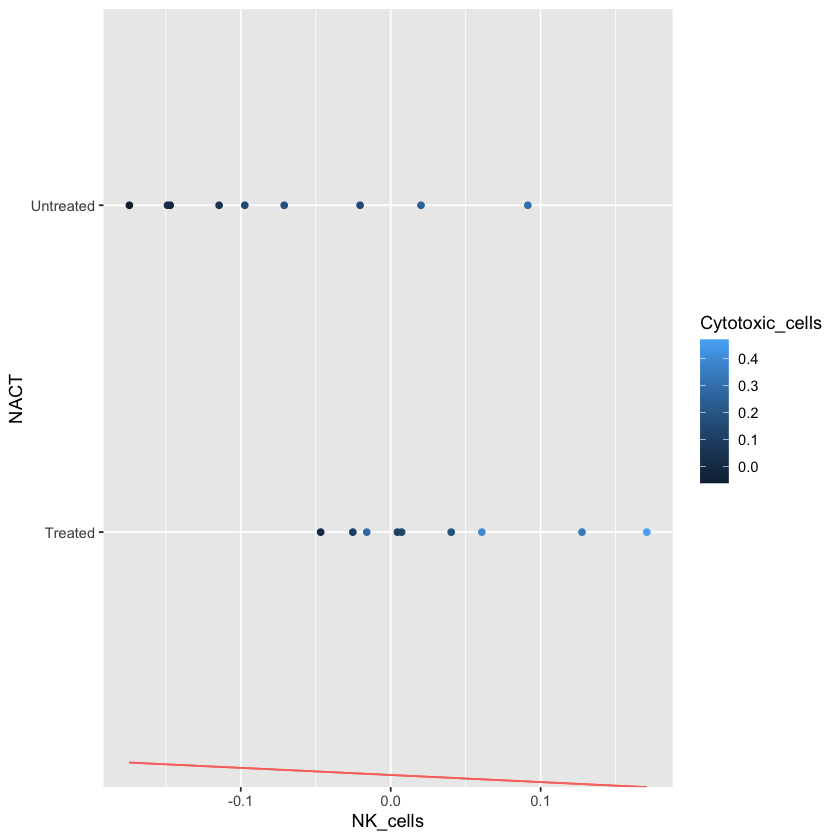

In [52]:
ggplot(matched,aes(y=NACT,x=NK_cells,color=Cytotoxic_cells))+geom_point()+
       stat_function(fun=equation1,geom="line",color=scales::hue_pal()(2)[1])+
       stat_function(fun=equation2,geom="line",color=scales::hue_pal()(2)[2])

In [53]:
nk_cytotoxic_matched_fit_glm <- glm(formula = NACT ~ NK_cells + Cytotoxic_cells,
                                    family = binomial, data = matched)

In [54]:
nk_cytotoxic_unmatched_fit_glm <- glm(formula = NACT ~ NK_cells + Cytotoxic_cells,
                                    family = binomial, data = unmatched)

In [55]:
summary(nk_cytotoxic_matched_fit_glm)


Call:
glm(formula = NACT ~ NK_cells + Cytotoxic_cells, family = binomial, 
    data = matched)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64410  -0.74293   0.02327   0.51782   2.13516  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.204      1.665  -1.324   0.1856  
NK_cells         -31.552     14.867  -2.122   0.0338 *
Cytotoxic_cells    9.815      8.072   1.216   0.2240  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.953  on 17  degrees of freedom
Residual deviance: 16.104  on 15  degrees of freedom
AIC: 22.104

Number of Fisher Scoring iterations: 5


In [16]:
devtools::install_github("davidgohel/gdtools")

systemfonts (NA -> 0.2.2) [CRAN]


Installing 1 packages: systemfonts



  There is a binary version available but the source version is later:
            binary source needs_compilation
systemfonts  0.1.1  0.2.2              TRUE



installing the source package ‘systemfonts’



ERROR: Error in i.p(...): (converted from warning) installation of package ‘systemfonts’ had non-zero exit status


In [15]:
library(gdtools)

ERROR: Error in library(gdtools): there is no package called ‘gdtools’


In [11]:
library(plyr)

In [12]:
library(ggiraph)

Warning message:
“package ‘ggiraph’ was built under R version 3.5.2”

ERROR: Error: package or namespace load failed for ‘ggiraph’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘gdtools’


In [61]:
#library(ggiraphExtra)

ERROR: Error: package or namespace load failed for ‘ggiraphExtra’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘gdtools’


In [63]:
summary(matched$NACT)

Treated Untreated 
        9         9

In [64]:
cd8_cytotoxic_matched_fit_glm <- glm(formula = NACT ~ T_cells_CD8 + Cytotoxic_cells,
                                     family = binomial, data = matched)

In [65]:
cd8_cytotoxic_unmatched_fit_glm <- glm(formula = NACT ~ T_cells_CD8 + Cytotoxic_cells,
                                    family = binomial, data = unmatched)

In [66]:
ggPredict(cd8_cytotoxic_matched_fit_glm,se=FALSE,interactive=FALSE,digits=100,
          colorn=100,jitter=TRUE)


ERROR: Error in ggPredict(cd8_cytotoxic_matched_fit_glm, se = FALSE, interactive = FALSE, : could not find function "ggPredict"


In [127]:
dev.copy(pdf,'../2.Plots/nk_cytotoxic_unmatched.pdf')

ggPredict(nk_cytotoxic_unmatched_fit_glm,se=FALSE,interactive=FALSE,digits=100,
          colorn=100,jitter=TRUE)

dev.off()

pdf 
  3

pdf 
  2

In [58]:
?ggPredict

In [42]:
cd8_cytotoxic_matched_fit_glm <- glm(formula = NACT ~ T_cells_CD8 + Cytotoxic_cells,
                                    family = binomial, data = matched)

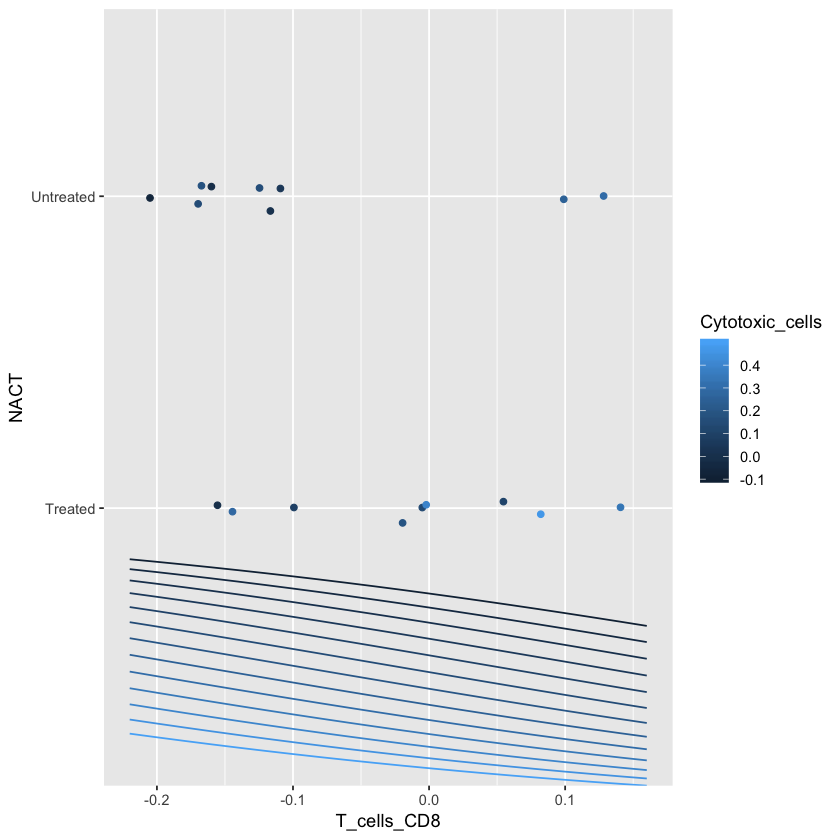

In [88]:
ggPredict(cd8_cytotoxic_matched_fit_glm,se=FALSE,interactive=FALSE,digits=3,
         colorn=10,jitter=TRUE)

In [48]:
endo_fibro_matched_fit_glm <- glm(formula = NACT ~ Endothelial+Fibroblasts,
                                    family = binomial, data = matched)

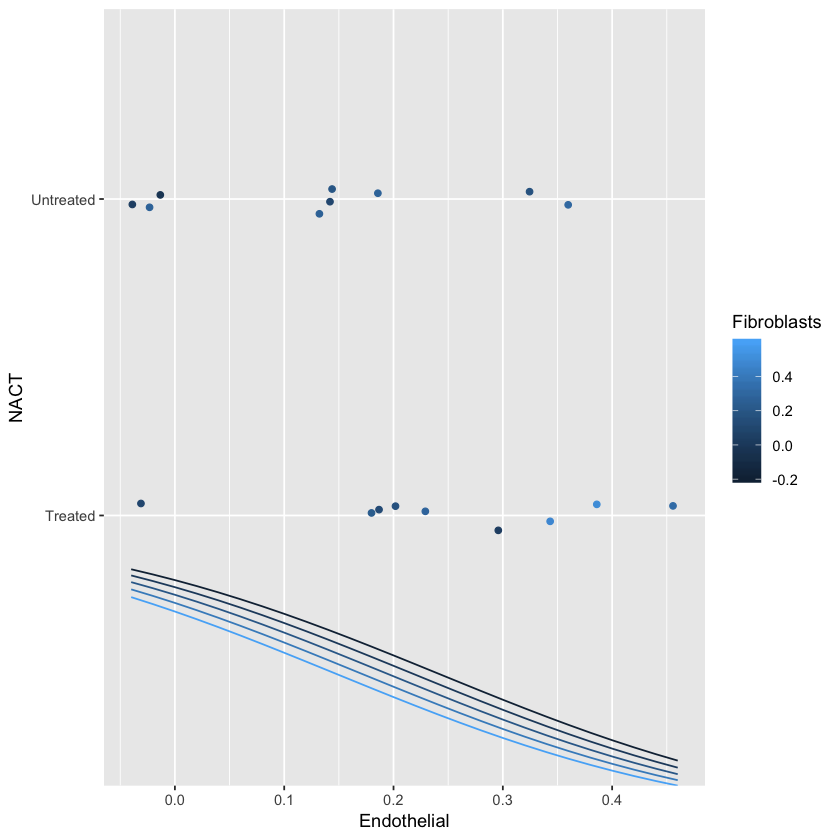

In [49]:
ggPredict(endo_fibro_matched_fit_glm,se=FALSE,interactive=FALSE,digits=3)

In [68]:
ggPredict(cd8_cytotoxic_matched_fit, interactive = FALSE)

ERROR: Error in ggPredict(cd8_cytotoxic_matched_fit, interactive = FALSE): object 'cd8_cytotoxic_matched_fit' not found


In [63]:
summary(nk_cytotoxic_matched_fit)


Call:
lm(formula = NK_cells + Cytotoxic_cells ~ NACT, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30923 -0.17137 -0.01125  0.17253  0.38298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.25709    0.07211   3.565  0.00258 **
NACTUntreated -0.21762    0.10198  -2.134  0.04868 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2163 on 16 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.1729 
F-statistic: 4.554 on 1 and 16 DF,  p-value: 0.04868


In [65]:
is.factor(matched$NK_cells)

[1] FALSE

In [ ]:
nk_cytotoxic_matched_fit

In [80]:
nk_matched_fit <- lm(formula = NK_cells ~ NACT, data = matched)

In [84]:
anova(nk_matched_fit,nk_cytotoxic_matched_fit)

Warning message in anova.lmlist(object, ...):
“models with response ‘"NK_cells + Cytotoxic_cells"’ removed because response differs from model 1”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
NACT,1,0.05390713,0.053907134,8.244065,0.01108248
Residuals,16,0.10462244,0.006538902,NA,NA


In [130]:
summary(nk_cytotoxic_matched_fit_glm)


Call:
glm(formula = NACT ~ NK_cells + Cytotoxic_cells, family = binomial, 
    data = matched)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.64410  -0.74293   0.02327   0.51782   2.13516  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.204      1.665  -1.324   0.1856  
NK_cells         -31.552     14.867  -2.122   0.0338 *
Cytotoxic_cells    9.815      8.072   1.216   0.2240  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.953  on 17  degrees of freedom
Residual deviance: 16.104  on 15  degrees of freedom
AIC: 22.104

Number of Fisher Scoring iterations: 5


In [141]:
anova(nk_cytotoxic_matched_fit_glm,
      update(nk_cytotoxic_matched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
15,16.10359,NA,NA,NA
17,24.95330,-2,-8.849705,0.01197598


In [142]:
anova(cd8_cytotoxic_matched_fit_glm,
      update(cd8_cytotoxic_matched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
15,22.03441,NA,NA,NA
17,24.95330,-2,-2.918893,0.2323649


In [143]:
anova(nk_cytotoxic_unmatched_fit_glm,
      update(nk_cytotoxic_unmatched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
35,51.94732,NA,NA,NA
37,52.67919,-2,-0.731864,0.69355


In [144]:
anova(cd8_cytotoxic_unmatched_fit_glm,
      update(cd8_cytotoxic_unmatched_fit_glm, ~1),
      test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
35,51.68731,NA,NA,NA
37,52.67919,-2,-0.9918745,0.6089998


In [145]:
help(summary.lm)